## Logistic Regression
Understanding logistic regression and being able to apply it to classification tasks is essential because logistic regression models form the fundamentals of neural networks.

We will use a real-world dataset that contains detailed nutrition information about food items for people with diabetes. The objective is to classify whether a diabetic patient should choose More Often, Less Often, or In Moderation for a specific food item based on the nutrition information in the dataset.

## Objective
Preprocess and generate training and testing datasets
Train and fine-tune logistic regression models
Interpret trained logistic regression models
Evaluate trained logistic regression models

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Load the dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items.csv"
food_df = pd.read_csv(dataset_url)

In [38]:
# set a random state
rs = 123

In [39]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [40]:
food_df.head(10)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'
5,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
6,142.0,0,0.0,0.0,0.0,0.0,0,12.0,10.6,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
7,102.0,0,0.0,0.0,0.0,0.0,0,13.0,5.0,0.0,0.0,0,0.7,0,0,0,0,'In Moderation'
8,145.0,0,0.0,0.0,0.0,0.0,0,17.0,11.0,0.0,0.0,0,1.2,0,0,0,0,'In Moderation'
9,171.0,0,0.0,0.0,0.0,0.0,0,8.0,13.7,0.0,0.0,0,2.5,0,0,0,0,'In Moderation'


In [41]:
features_cols = list(food_df.iloc[:,:-1].columns)
features_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [42]:
food_df.iloc[:, -1].describe()

count               13260
unique                  3
top       'In Moderation'
freq                 6649
Name: class, dtype: object

In [43]:
#  Get the row entries with the last col 'class'
food_df.iloc[:,-1:].value_counts(normalize=True)

class          
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
Name: proportion, dtype: float64

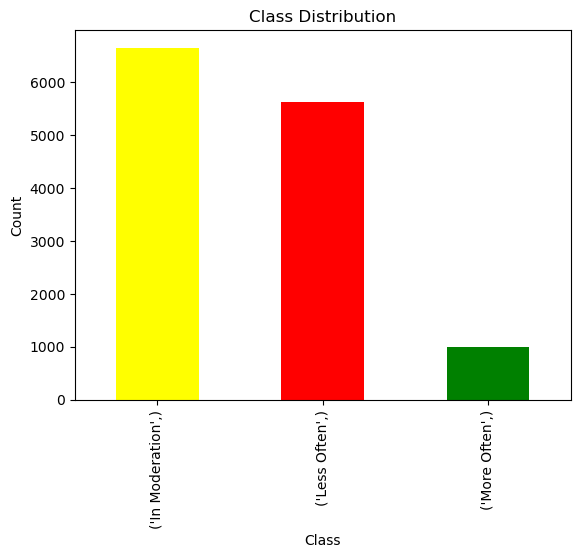

In [44]:

food_df.iloc[:, -1:].value_counts().plot.bar(color=['yellow', 'red', 'green'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [45]:
X_raw = food_df.iloc[:, :-1]
y_raw = food_df.iloc[:, -1:]

In [46]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [47]:
# Scaling the raw input features
X = scaler.fit_transform(X_raw)

In [48]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


In [49]:
# Create a LabelEncoder object
le = LabelEncoder()
# Encode the target labels
y = le.fit_transform(y_raw.values.ravel())

In [50]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990], dtype=int64))

## Train Logistic regression model

In [58]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2, stratify=y, random_state=rs)

In [52]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (10608, 17), y_train: (2652, 17)


In [53]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (10608,), y_test: (2652,)


In [60]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty = 'l2'
# Solver for multinomial classification (multinomial is now the default)
solver = 'lbfgs'
max_iter=1000

In [61]:
# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter=max_iter)

In [62]:
l2_model.fit(X_train, y_train)
l2_preds = l2_model.predict(X_test)

In [63]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [65]:
metrics = evaluate_metrics(y_test, l2_preds)
print(metrics)

{'accuracy': 0.7748868778280543, 'recall': array([0.87368421, 0.73220641, 0.35353535]), 'precision': array([0.73035827, 0.83553299, 0.92105263]), 'f1score': array([0.79561794, 0.78046468, 0.51094891])}


In [69]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Use saga solver for L1 penalty (multinomial is now the default)
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

In [70]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter=max_iter)

In [71]:
l1_model.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [72]:
l1_preds = l1_model.predict(X_test)

In [73]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([3.55065558e-02, 9.64491964e-01, 1.47991419e-06])

In [74]:
l1_model.predict(X_test[:1, :])[0]

1

In [75]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'f1score': array([0.82034632, 0.78682353, 0.85012285])}

## Confusion Matrix

In [76]:
cf = confusion_matrix(y_test,l1_preds, normalize ='true')

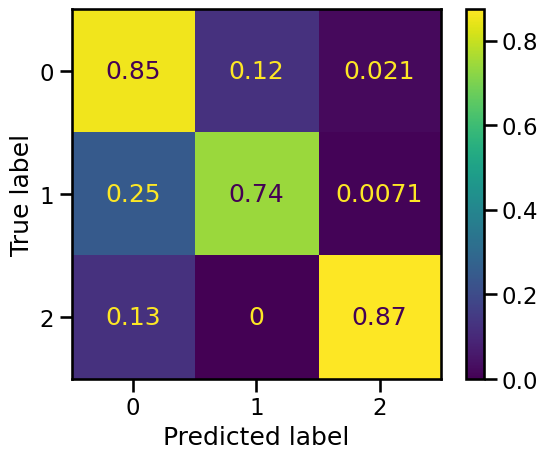

In [77]:
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()

In [78]:
l1_model.coef_

array([[ 1.02260612e+01,  0.00000000e+00,  0.00000000e+00,
         5.28211590e+00,  0.00000000e+00, -3.70560617e+00,
         0.00000000e+00,  9.11923717e-01,  0.00000000e+00,
         2.26627496e+01,  0.00000000e+00,  0.00000000e+00,
         4.30564271e+00,  1.36942545e-01,  0.00000000e+00,
         1.83340368e+00, -2.06761520e-02],
       [ 0.00000000e+00,  4.20223530e+00,  2.46648466e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.94277520e+00,  0.00000000e+00,  1.32251480e+00,
        -6.79834695e+00,  1.51669845e+01,  3.46648083e+00,
         0.00000000e+00, -1.71144958e+00,  0.00000000e+00,
        -1.47866235e-01,  0.00000000e+00],
       [-1.11431018e+02, -2.91410454e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.59642876e+00, -4.13437893e+01,
         0.00000000e+00, -9.27079323e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.0

In [79]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

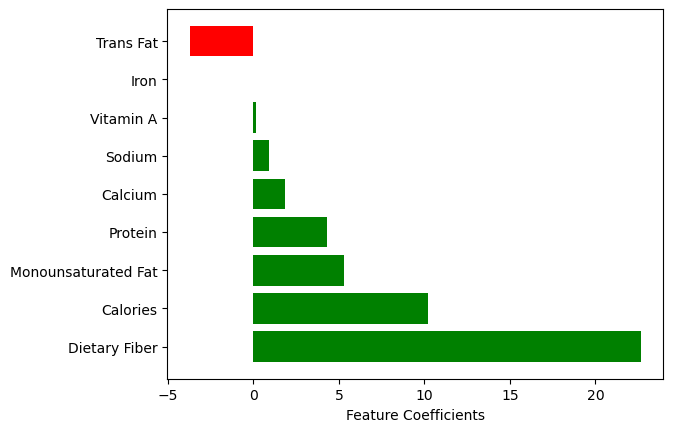

In [84]:
# Coefficients for Class 2
coef_dict = get_feature_coefs(l1_model, 0, features_cols)
visualize_coefs(coef_dict)

In [80]:
coef_dict = get_feature_coefs(l1_model, 1, features_cols)

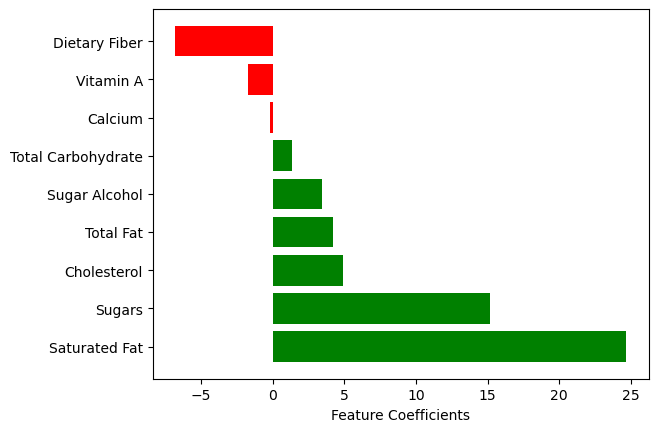

In [81]:
visualize_coefs(coef_dict)

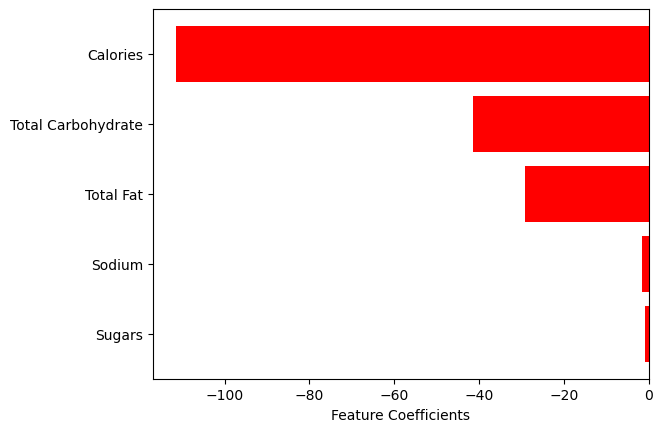

In [83]:
# Coefficients for Class 2
coef_dict = get_feature_coefs(l1_model, 2, features_cols)
visualize_coefs(coef_dict)

## With elastic-net penalty

In [86]:
# elasticnet penalty to shrink coefficients without removing any features from the model
penalty= 'elasticnet'
# Our classification problem is multinomial
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000
# l1_ratio
l1_ratio = 0.1

# Define a elastic-net model
en_model = LogisticRegression(random_state=rs, penalty=penalty, solver=solver, max_iter = 1000, l1_ratio=l1_ratio)
en_model.fit(X_train, y_train)
# Make predictions
preds = en_model.predict(X_test)

In [87]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


## How the Model Learned What's "Better" for Diabetic Patients

The model didn't figure out on its own what's good or bad for diabetic patients. Instead, it learned from **expert-labeled data** where nutrition professionals already classified each food item into three categories based on diabetic dietary guidelines.

In [88]:
# Let's examine what the target labels look like
print("Unique classes in the dataset:")
print(food_df.iloc[:, -1].unique())
print("\nClass distribution:")
print(food_df.iloc[:, -1].value_counts())
print("\nThese labels were created by nutrition experts based on diabetic dietary guidelines!")

Unique classes in the dataset:
["'In Moderation'" "'Less Often'" "'More Often'"]

Class distribution:
class
'In Moderation'    6649
'Less Often'       5621
'More Often'        990
Name: count, dtype: int64

These labels were created by nutrition experts based on diabetic dietary guidelines!


### How the Learning Process Works:

**1. Expert Knowledge → Labels**
- Nutrition experts analyzed each food item
- They considered factors like: glycemic index, fiber content, sugar levels, healthy fats, etc.
- Based on diabetic dietary guidelines, they assigned each food to one of three categories

**2. Machine Learning Pattern Recognition**
- The model studied thousands of examples with their expert labels
- It learned to identify nutrition patterns that correlate with each recommendation category
- For example: "High fiber + low sugar + moderate calories = More Often"

**3. Model Discovers Hidden Relationships**
- The model found which nutritional features are most important for each category
- It learned complex interactions between multiple nutrition factors
- This is why we can visualize feature coefficients to understand the decision-making process

In [91]:
# Let's see what nutritional patterns the model learned for each class
print("What the model learned about 'More Often' foods:")
print("Features with POSITIVE coefficients (increase likelihood of 'More Often'):")
coef_dict_0 = get_feature_coefs(l1_model, 0, features_cols)
positive_features = {k: v for k, v in coef_dict_0.items() if v > 0}
for feature, coef in positive_features.items():
    print(f"  {feature}: {coef:.3f}")

print("\nFeatures with NEGATIVE coefficients (decrease likelihood of 'More Often'):")
negative_features = {k: v for k, v in coef_dict_0.items() if v < 0}
for feature, coef in negative_features.items():
    print(f"  {feature}: {coef:.3f}")

print("INTERPRETATION:")
print("- High fiber, protein → More likely 'More Often' (good for diabetics)")
print("- High calories, sugar, fat → Less likely 'More Often' (avoid frequently)")
print("- The model learned these patterns from expert-labeled training data!")

What the model learned about 'More Often' foods:
Features with POSITIVE coefficients (increase likelihood of 'More Often'):
  Vitamin A: 0.137
  Sodium: 0.912
  Calcium: 1.833
  Protein: 4.306
  Monounsaturated Fat: 5.282
  Calories: 10.226
  Dietary Fiber: 22.663

Features with NEGATIVE coefficients (decrease likelihood of 'More Often'):
  Trans Fat: -3.706
  Iron: -0.021
INTERPRETATION:
- High fiber, protein → More likely 'More Often' (good for diabetics)
- High calories, sugar, fat → Less likely 'More Often' (avoid frequently)
- The model learned these patterns from expert-labeled training data!
